# Pymaceuticals Inc.
---

### Analysis - Observations

- Please see attached PDF document. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# mouse_metadata.head()
# mouse_metadata.info()

In [3]:
# study_results.head()
# study_results.info()

In [4]:
# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID",  how="left")
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
df.set_index(["Mouse ID", "Timepoint"])


,,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,Timepoint,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
f932,0,45.000000,0,Ketapril,Male,15,29
g107,0,45.000000,0,Ketapril,Female,2,29
a457,0,45.000000,0,Ketapril,Female,11,30
c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...
r944,45,41.581521,2,Capomulin,Male,12,25
u364,45,31.023923,3,Capomulin,Male,18,17
p438,45,61.433892,1,Ceftamin,Female,11,26


In [7]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. **Ask the Expert
dup_mice = df[df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print(dup_mice)


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female 

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df["Mouse ID"] != "g989"] 

In [10]:
# Checking the number of mice in the clean DataFrame.
updated_mice_count = clean_df["Mouse ID"].nunique()
updated_mice_count

248

In [11]:
# clean_df.head(25)
# clean_df.info

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_var = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_std = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

data = {
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume" : tumor_median,
    "Tumor Volume Variance" : tumor_var,
    "Tumor Volume Std. Dev." : tumor_std,
    "Tumor Volume Std. Err." : tumor_sem
    
}

summ1 = pd.DataFrame(data).reset_index()
summ1

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg= {
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
}
summ2 = clean_df.groupby(["Drug Regimen"]).agg(tumor_agg).reset_index()
summ2

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

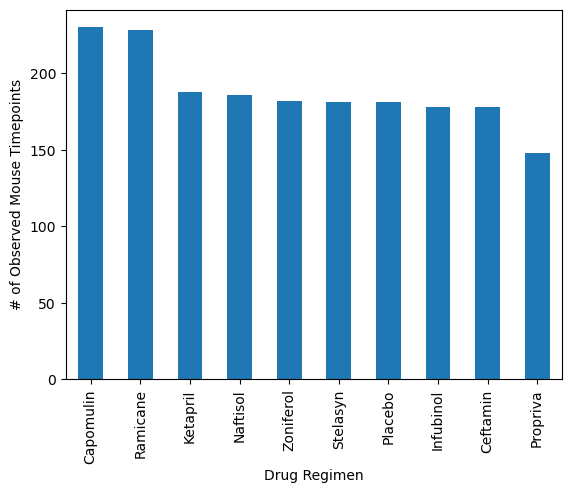

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df["Drug Regimen"].value_counts().plot(kind="bar",xlabel=("Drug Regimen"),
ylabel=("# of Observed Mouse Timepoints")) 
plt.show

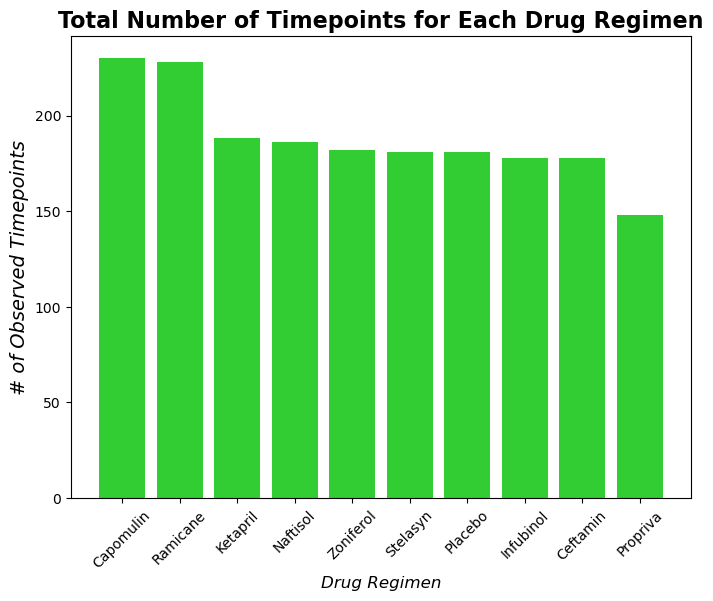

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data = clean_df["Drug Regimen"].value_counts()
x = list(data.index)
y = list(data.values)
plt.figure(figsize=(8,6))
plt.bar(x,y, color="limegreen")
plt.xlabel("Drug Regimen", fontsize=12, fontstyle="italic")
plt.ylabel("# of Observed Timepoints", fontsize=14, fontstyle="italic")
plt.title("Total Number of Timepoints for Each Drug Regimen", fontsize=16, fontweight="bold")
plt.xticks(rotation=45) 
plt.show()

In [16]:
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


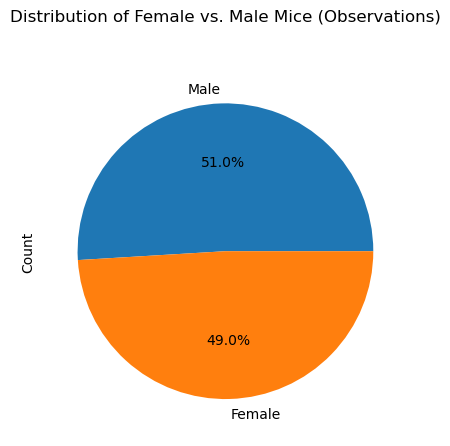

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df["Sex"].value_counts().reset_index() 
gender.columns = ["Sex", "Count"] 
gender.set_index("Sex").plot(kind="pie", y="Count",autopct="%1.1f%%", legend=False) 
plt.title("Distribution of Female vs. Male Mice (Observations)", y=1.1) #ask the expert - how to adjust the position of the title
plt.show()

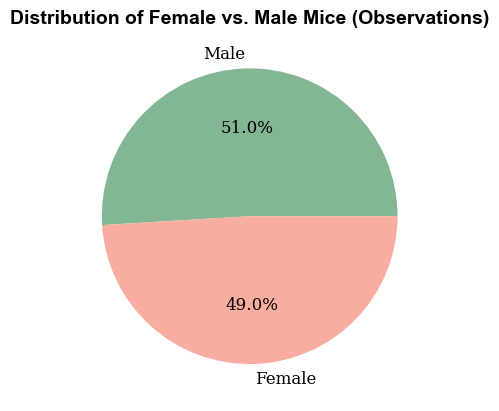

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_df["Sex"].value_counts().reset_index()
gender.columns = ["Sex", "Count"]
colors = ["#83B692", "#F9ADA0"]
plt.pie(gender["Count"], labels=gender["Sex"], colors=colors, autopct="%1.1f%%", textprops={"fontfamily": "serif", "fontsize": 12,}) # Ask the expert
plt.title("Distribution of Female vs. Male Mice (Observations)", fontname="Arial", fontsize=14, fontweight="bold")
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_tumor = greatest_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
volume_data = greatest_tumor.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")
# volume_data.head()

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = volume_data.loc[volume_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f'({drug} potential outliers: {outliers})')

(Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64)
(Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))


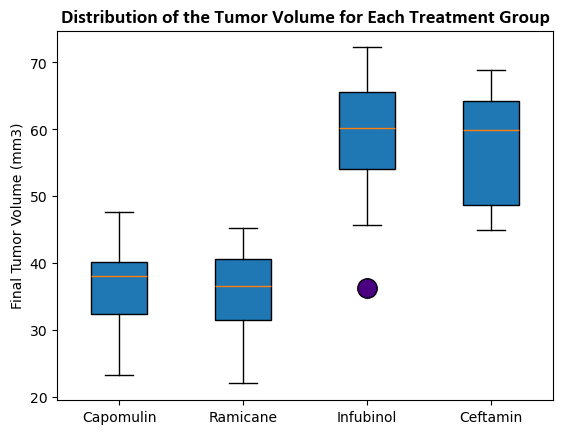

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
vol_out = dict(markerfacecolor="indigo",markersize=14)
colors = ["cornflowerblue"]
plt.boxplot(tumor_vol_list, labels = regimen_list, flierprops=vol_out, patch_artist=True,)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of the Tumor Volume for Each Treatment Group", fontfamily="Calibri", fontsize=14, fontweight="bold")
plt.show()

## Line and Scatter Plots

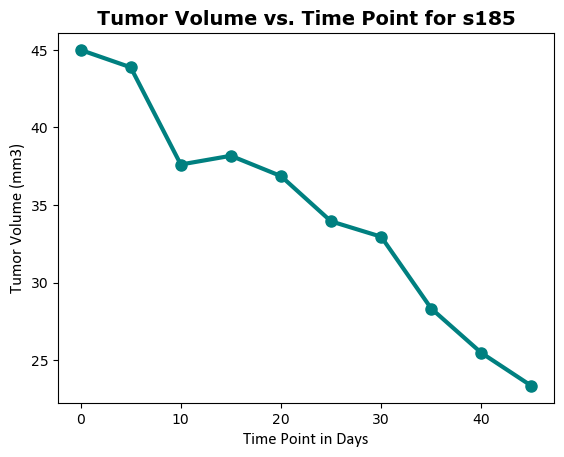

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

m_data = capomulin.loc[capomulin["Mouse ID"] == "s185"]

time = m_data["Timepoint"]
y = m_data["Tumor Volume (mm3)"]

plt.plot(time, y, color="teal", linewidth=3, marker="o", markersize=8)
plt.xlabel("Time Point in Days", fontfamily="Calibri", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Calibri", fontsize=12)
plt.title("Tumor Volume vs. Time Point for s185", fontfamily="Verdana", fontsize=14, fontweight="bold")
plt.show()
# m_data.head()
# m_data.tail()

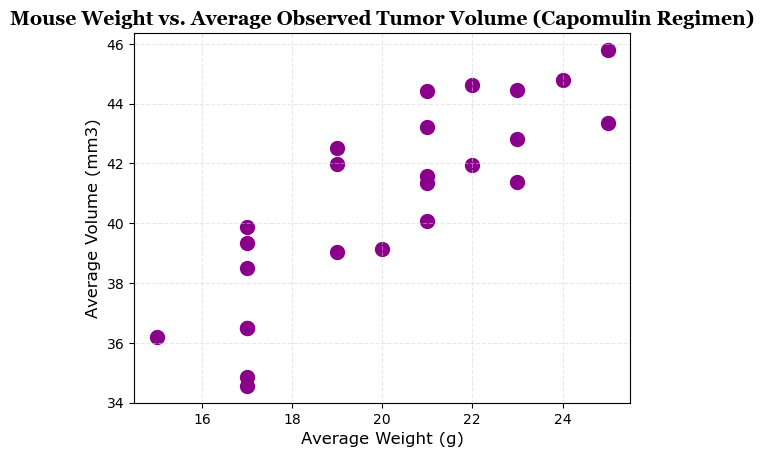

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]
plt.scatter(x, y, facecolor="darkmagenta", s=100)
# plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"], facecolor="dark magenta")
plt.xlabel("Average Weight (g)", fontfamily="Verdana", fontsize=12)
plt.ylabel("Average Volume (mm3)", fontfamily="Verdana", fontsize=12)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.title("Mouse Weight vs. Average Observed Tumor Volume (Capomulin Regimen)", fontfamily="Georgia", fontsize=14, fontweight="bold")
plt.show()


## Correlation and Regression

In [24]:
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Used code from Week 5, Day 3, #7 - Correlations - Wine data set
corrs = capomulin_average.corr(numeric_only = True)
corrs




,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [26]:
.84 ** 2

0.7055999999999999

y = 0.95x + 21.55
The r-squared is: 0.7088568047708723


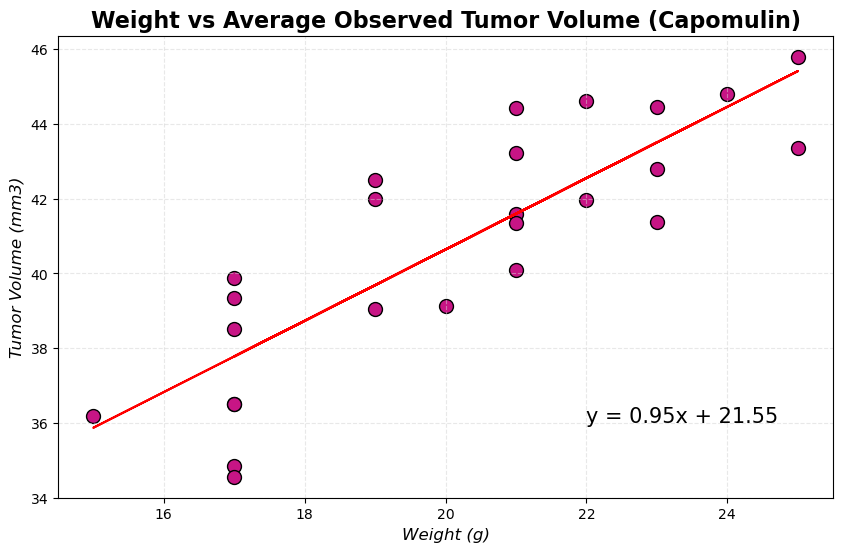

In [27]:
x_values = capomulin_average["Weight (g)"]
y_values = capomulin_average["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.figure(figsize=(10, 6))

plt.scatter(x_values, y_values, facecolor="mediumvioletred", edgecolor="black", s=100)
plt.plot(x_values, regress_values, "r-") 

plt.xlabel("Weight (g)", fontsize=12, fontstyle="italic")
plt.ylabel("Tumor Volume (mm3)", fontsize=12, fontstyle="italic")
plt.title("Weight vs Average Observed Tumor Volume (Capomulin)", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

plt.annotate(line_eq,(22, 36),fontsize=15,color="black")

print(f"The r-squared is: {rvalue**2}")
plt.show()